# Exploratory Data Analysis for News Dataset

This notebook explores the news dataset to understand its structure, content patterns, and sentiment distribution.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Set style for visualizations
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

## 1. Loading and Examining the Dataset

In [ ]:
file_path = "data/news.csv"
df = pd.read_csv(file_path)
df.head(10)

,date,news,neg,neu,pos,compound,sentiment
0,2007-07-07,It was a long antipodean night. While there’s ...,0.059000,0.878000,0.064000,0.051600,POSITIVE
1,2007-07-07,In Mexico there are no licensing or registrati...,0.044000,0.956000,0.000000,-0.296000,NEGATIVE
2,2007-07-07,The government has until Monday to protect the...,0.000000,0.894000,0.106000,0.381800,POSITIVE
3,2007-07-07,A record-breaking heat wave in the Southwest i...,0.197505,0.661490,0.141005,0.997491,POSITIVE
4,2007-07-07,England started its Live Earth concert at Wemb...,0.033000,0.945000,0.022000,-0.177900,NEGATIVE
5,2007-07-07,The Lewis Hamilton effect is felt everywhere. ...,0.000000,0.965000,0.035000,0.361200,POSITIVE
6,2007-07-07,The Sam’s Army ratings polls reflect the gener...,0.102000,0.786000,0.112000,0.340000,POSITIVE
7,2008-06-08,b'Chiapas: army occupies Zapatista communities...,0.241577,0.735335,0.023087,0.943535,NEGATIVE
8,2008-06-08,"b""Canada: Beware slippery slope' to censorship...",0.609306,0.375088,0.015605,0.967464,NEGATIVE
9,2008-06-08,"b""Oil reserves 'will last decades' - a BBC Sco...",0.238956,0.713291,0.047753,0.791826,NEGATIVE


In [8]:
# Set pandas display options to show full text content
pd.set_option('display.max_colwidth', None)
df.head(20)

,date,news,neg,neu,pos,compound,sentiment
0,2007-07-07,"It was a long antipodean night. While there’s no telling what’s a reflection of national taste and what’s the result of booking expediency, each of the concerts from Australia, Japan and China certainly had its own character.",0.059000,0.878000,0.064000,0.051600,POSITIVE
1,2007-07-07,"In Mexico there are no licensing or registration requirements for real estate agents, which means your bartender in the nightclub might show up as your agent the next day. Anyone can represent themselves as an agent. While rare, stories abound of unscrupulous or simply under-prepared agents fouling up deals.",0.044000,0.956000,0.000000,-0.296000,NEGATIVE
2,2007-07-07,The government has until Monday to protect the redacted names of baseball players who were supplied performance-enhancing drugs by a former Mets clubhouse attendant.,0.000000,0.894000,0.106000,0.381800,POSITIVE
3,2007-07-07,A record-breaking heat wave in the Southwest is pushing northward.,0.197505,0.661490,0.141005,0.997491,POSITIVE
4,2007-07-07,"England started its Live Earth concert at Wembley Stadium with an international drum tattoo: rockers at their kits, Scotsmen in kilts, Brazilian and Japanese and African drums. Then the show went decidedly British, mixing bombast, yearning and self-pity. The latest Genesis reunion did it with fast fingers and prog-rock intricacy; its all-purpose complaint about the state of the world, “Land of Confusion,” was still germane.",0.033000,0.945000,0.022000,-0.177900,NEGATIVE
5,2007-07-07,"The Lewis Hamilton effect is felt everywhere. When I left the paddock last night after 10:30 PM – when I took the photo below to provide another view of the new McLaren motor home, as promised – it took 25 minutes to drive back to my hotel in Northampton. When I returned to the track this morning shortly after 8:00 AM, it took an hour and a half. The Hamilton phenomenon is living up to expectation.",0.000000,0.965000,0.035000,0.361200,POSITIVE
6,2007-07-07,"The Sam’s Army ratings polls reflect the general disappointment with the Nats at the Copa América, but they also show that a handful of players impressed the fans who pay the closest attention.",0.102000,0.786000,0.112000,0.340000,POSITIVE
7,2008-06-08,"b'Chiapas: army occupies Zapatista communities in ""anti-drug"" ops'",0.241577,0.735335,0.023087,0.943535,NEGATIVE
8,2008-06-08,"b""Canada: Beware slippery slope' to censorship, hearing told """,0.609306,0.375088,0.015605,0.967464,NEGATIVE
9,2008-06-08,"b""Oil reserves 'will last decades' - a BBC Scotland investigation has been told""",0.238956,0.713291,0.047753,0.791826,NEGATIVE


In [3]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
df.describe(include='all').T

Dataset shape: (427482, 7)

Columns in the dataset:
['date', 'news', 'neg', 'neu', 'pos', 'compound', 'sentiment']

Data types:
date          object
news          object
neg          float64
neu          float64
pos          float64
compound     float64
sentiment     object
dtype: object

Summary statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,427482,5892,2021-01-27,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
news,427482,414720,Here’s what you need to know at the end of the...,1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neg,427482.0,NaN,NaN,NaN,0.140294,0.16647,0.0,0.0,0.095,0.207872,1.0
neu,427482.0,NaN,NaN,NaN,0.742719,0.162196,0.0,0.672,0.782,0.861,0.98
pos,427482.0,NaN,NaN,NaN,0.116985,0.135587,0.0,0.004264,0.087,0.167336,1.0
compound,427482.0,NaN,NaN,NaN,0.24387,0.623274,-0.9908,-0.34,0.3612,0.877805,0.999887
sentiment,427482,2,NEGATIVE,217443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Quality Assessment

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing values in each column:")
display(missing_df[missing_df['Missing Values'] > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates} ({(duplicates/len(df)*100):.2f}%)")

Missing values in each column:


,Missing Values,Percentage



Number of duplicate rows: 0 (0.00%)


## 3. Text Length Analysis

c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


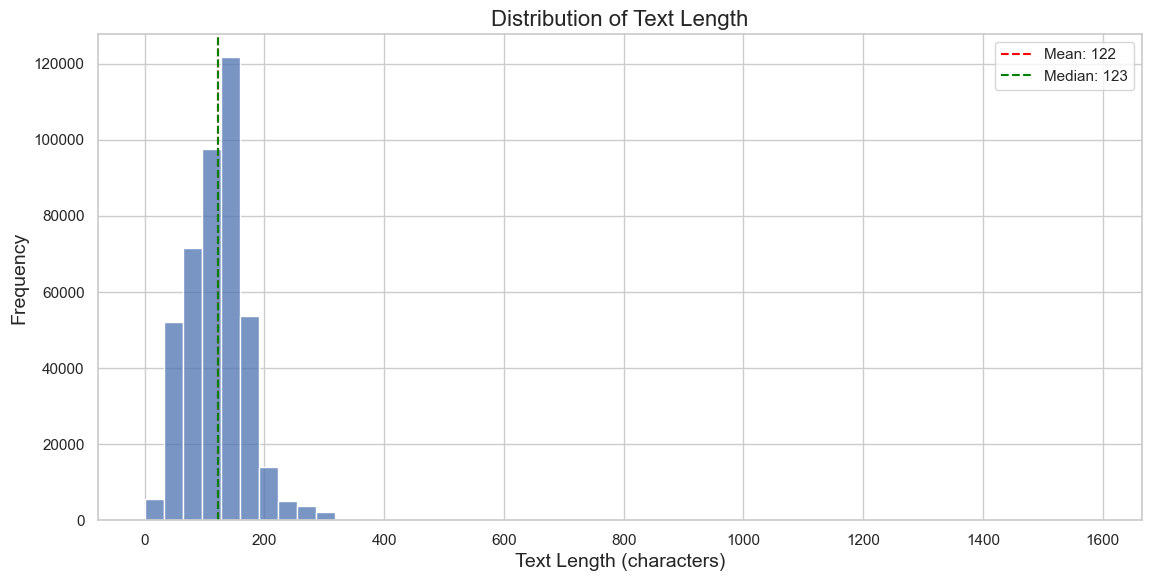

Text length statistics:
count    427482.000000
mean        122.156767
std          49.049594
min           1.000000
25%          89.000000
50%         123.000000
75%         151.000000
max        1586.000000
Name: text_length, dtype: float64


In [5]:
# Assuming there's a 'content' or 'text' column - adjust as needed based on actual column names
text_column = [col for col in df.columns if col.lower() in ['content', 'text', 'article', 'body', 'news']]

if text_column:
    text_column = text_column[0]
    df['text_length'] = df[text_column].astype(str).apply(len)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['text_length'], bins=50)
    plt.title(f'Distribution of Text Length', fontsize=16)
    plt.xlabel('Text Length (characters)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.0f}')
    plt.axvline(df['text_length'].median(), color='green', linestyle='--', label=f'Median: {df["text_length"].median():.0f}')
    plt.legend()
    plt.show()

    # Summary statistics of text length
    text_length_stats = df['text_length'].describe()
    print("Text length statistics:")
    print(text_length_stats)

## 4. Word Frequency Analysis

c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


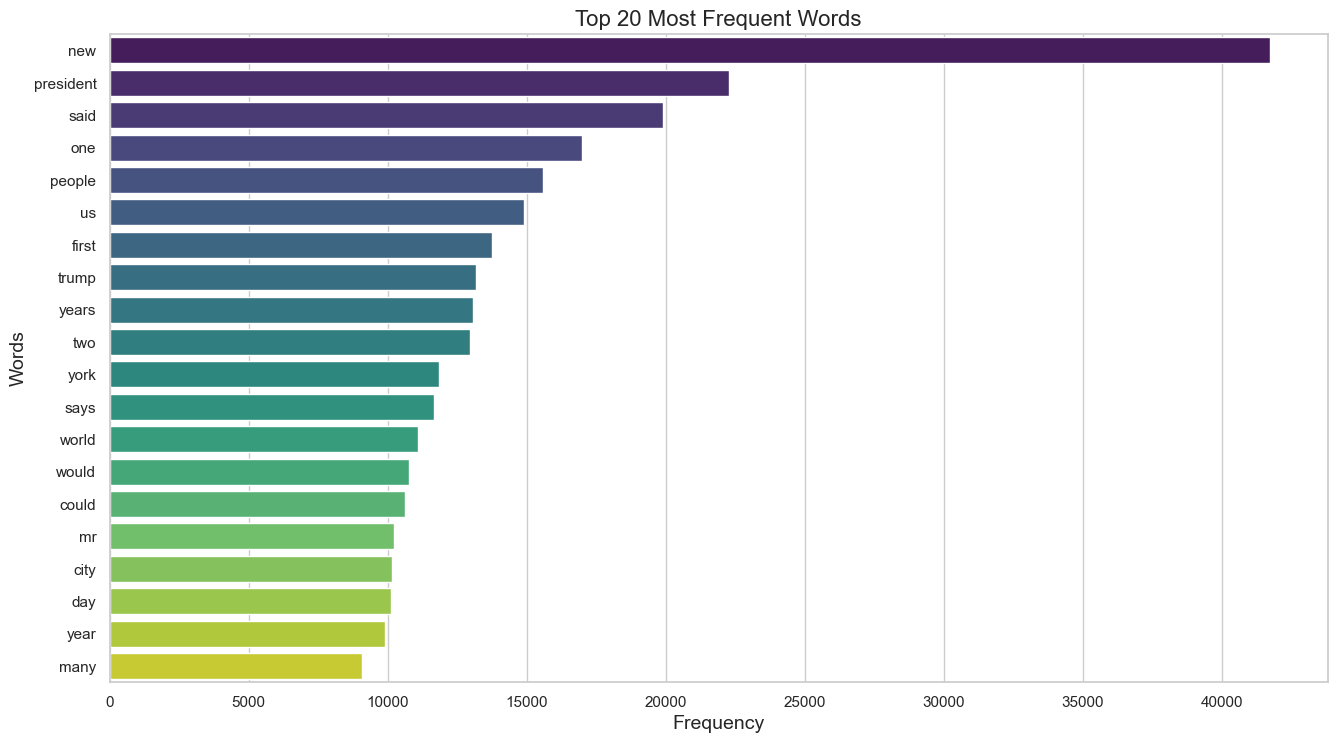

In [6]:
# Get the text content for word analysis - adjust column name as needed
text_column = [col for col in df.columns if col.lower() in ['content', 'text', 'article', 'body', 'news']]

if text_column:
    text_column = text_column[0]
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].astype(str).tolist())
    
    # Clean text and split into words
    all_text = all_text.lower()
    all_text = re.sub(r'[^\w\s]', '', all_text)  # Remove punctuation
    words = all_text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 1]
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Get the top 20 most frequent words
    most_common_words = word_counts.most_common(20)
    words, counts = zip(*most_common_words)
    
    # Plotting the word frequency distribution
    plt.figure(figsize=(14, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title('Top 20 Most Frequent Words', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

## 5. Word Cloud Visualization

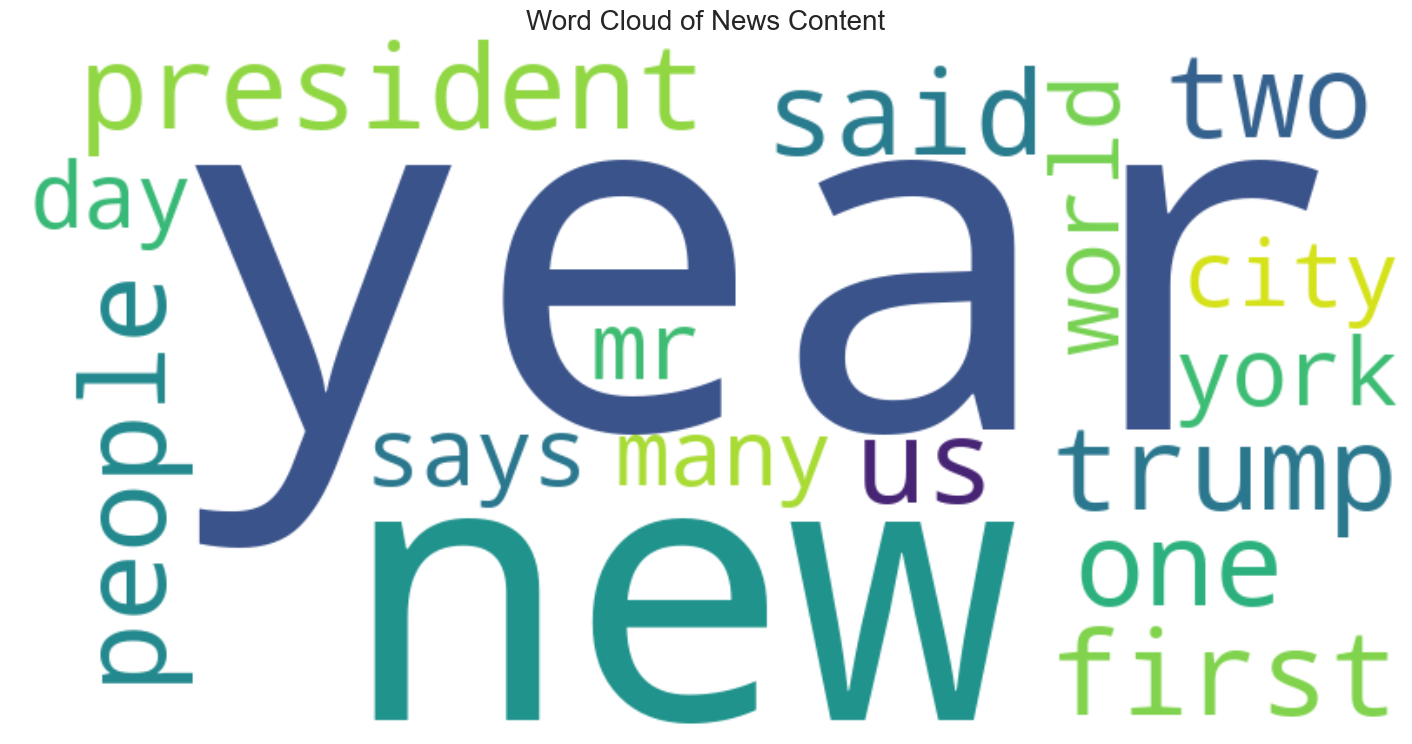

In [7]:
# Create a word cloud visualization
if 'words' in locals():
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=200,
        contour_width=3,
        contour_color='steelblue'
    ).generate(' '.join(words))
    
    plt.figure(figsize=(16, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of News Content', fontsize=20)
    plt.show()

## 6. Sentiment Analysis (if available)

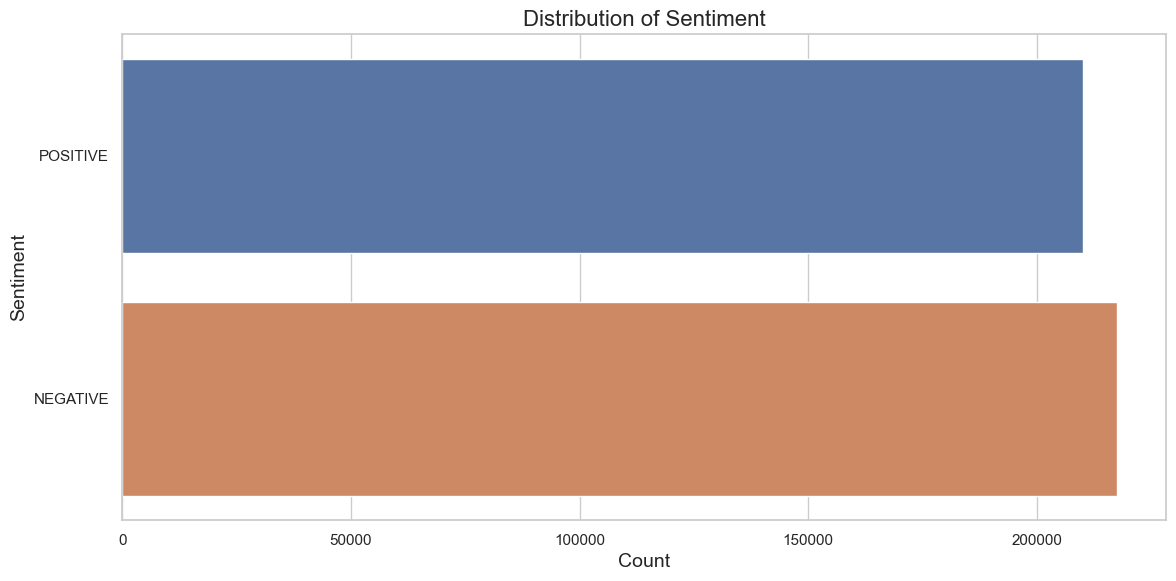

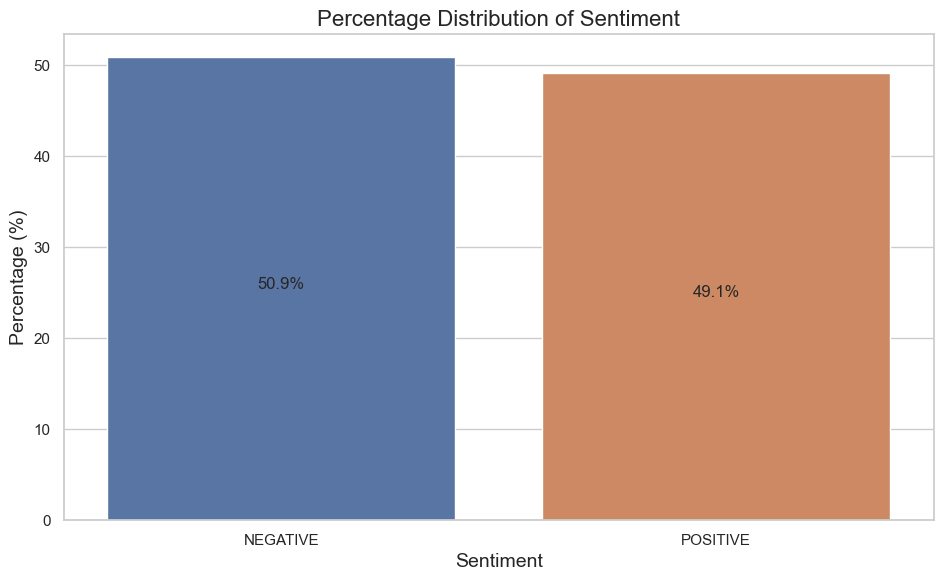

In [8]:
# Check if sentiment columns exist
sentiment_cols = [col for col in df.columns if 'sentiment' in col.lower()]

if sentiment_cols:
    sentiment_col = sentiment_cols[0]
    
    # Distribution of sentiment
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[sentiment_col])
    plt.title('Distribution of Sentiment', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Sentiment', fontsize=14)
    plt.show()

    # Percentage distribution
    sentiment_dist = df[sentiment_col].value_counts(normalize=True).reset_index()
    sentiment_dist.columns = ['Sentiment', 'Percentage']
    sentiment_dist['Percentage'] = sentiment_dist['Percentage'] * 100
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sentiment', y='Percentage', data=sentiment_dist)
    plt.title('Percentage Distribution of Sentiment', fontsize=16)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.xlabel('Sentiment', fontsize=14)
    for i, row in enumerate(sentiment_dist.itertuples()):
        plt.text(i, row.Percentage/2, f'{row.Percentage:.1f}%', ha='center', fontsize=12)
    plt.show()

## 7. Time Series Analysis

c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


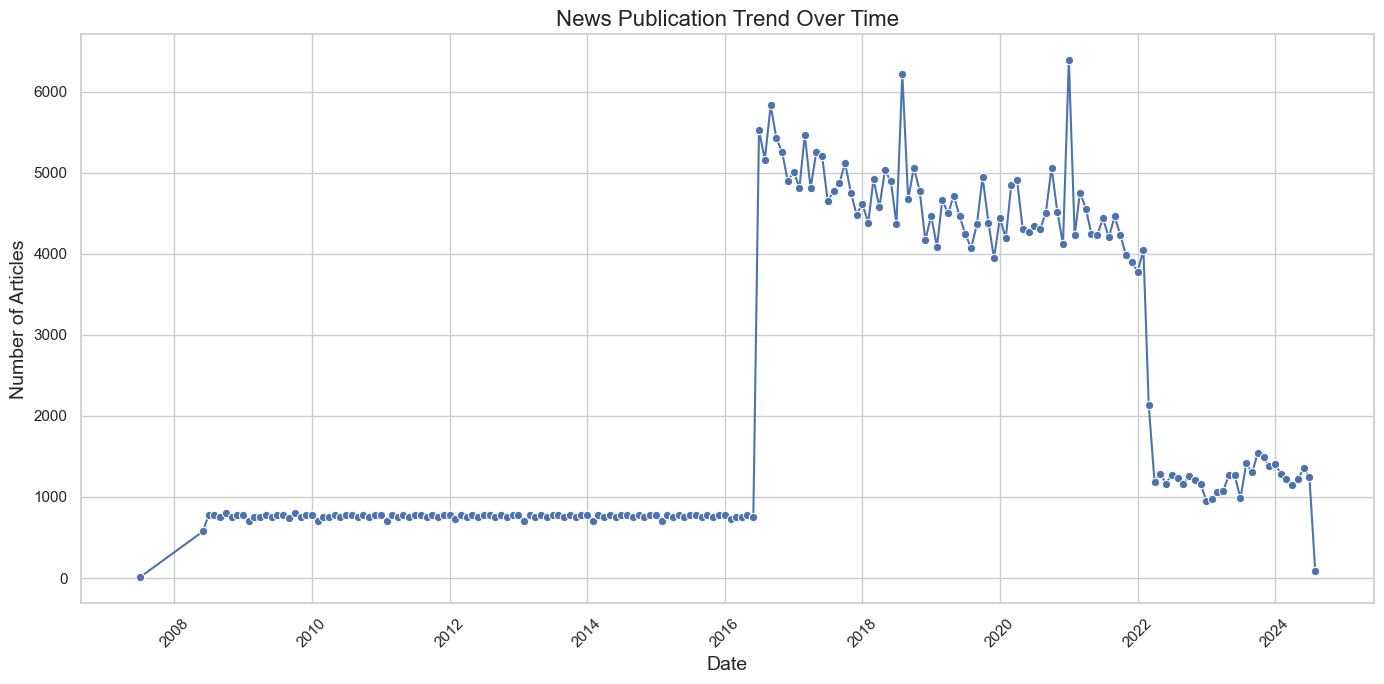

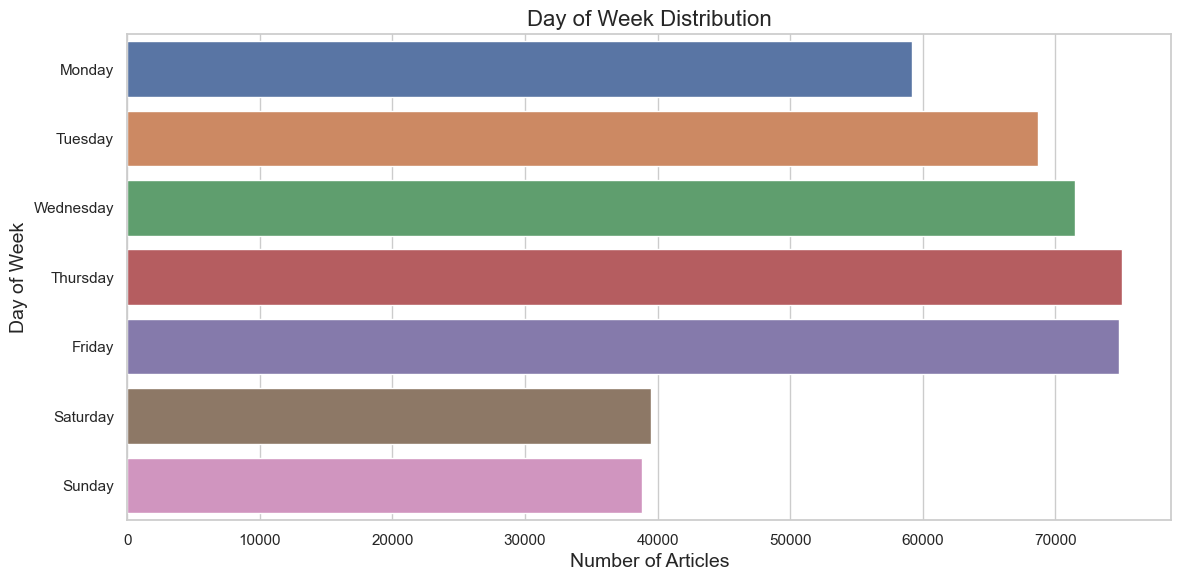

In [9]:
# Look for date columns
date_cols = [col for col in df.columns if any(date_term in col.lower() for date_term in ['date', 'time', 'published', 'created'])]

if date_cols:
    date_col = date_cols[0]
    
    # Convert to datetime if not already
    if df[date_col].dtype != 'datetime64[ns]':
        try:
            df[date_col] = pd.to_datetime(df[date_col])
            
            # Extract date components
            df['year'] = df[date_col].dt.year
            df['month'] = df[date_col].dt.month
            df['day'] = df[date_col].dt.day
            df['day_of_week'] = df[date_col].dt.day_name()
            
            # Monthly publication trend
            monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
            monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))
            
            plt.figure(figsize=(14, 7))
            sns.lineplot(x='date', y='count', data=monthly_counts, marker='o')
            plt.title('News Publication Trend Over Time', fontsize=16)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Number of Articles', fontsize=14)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Day of week distribution
            plt.figure(figsize=(12, 6))
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            sns.countplot(y='day_of_week', data=df, order=order)
            plt.title('Day of Week Distribution', fontsize=16)
            plt.xlabel('Number of Articles', fontsize=14)
            plt.ylabel('Day of Week', fontsize=14)
            plt.show()
        except Exception as e:
            print(f"Error processing date column: {e}")

## 8. Correlation Between Features

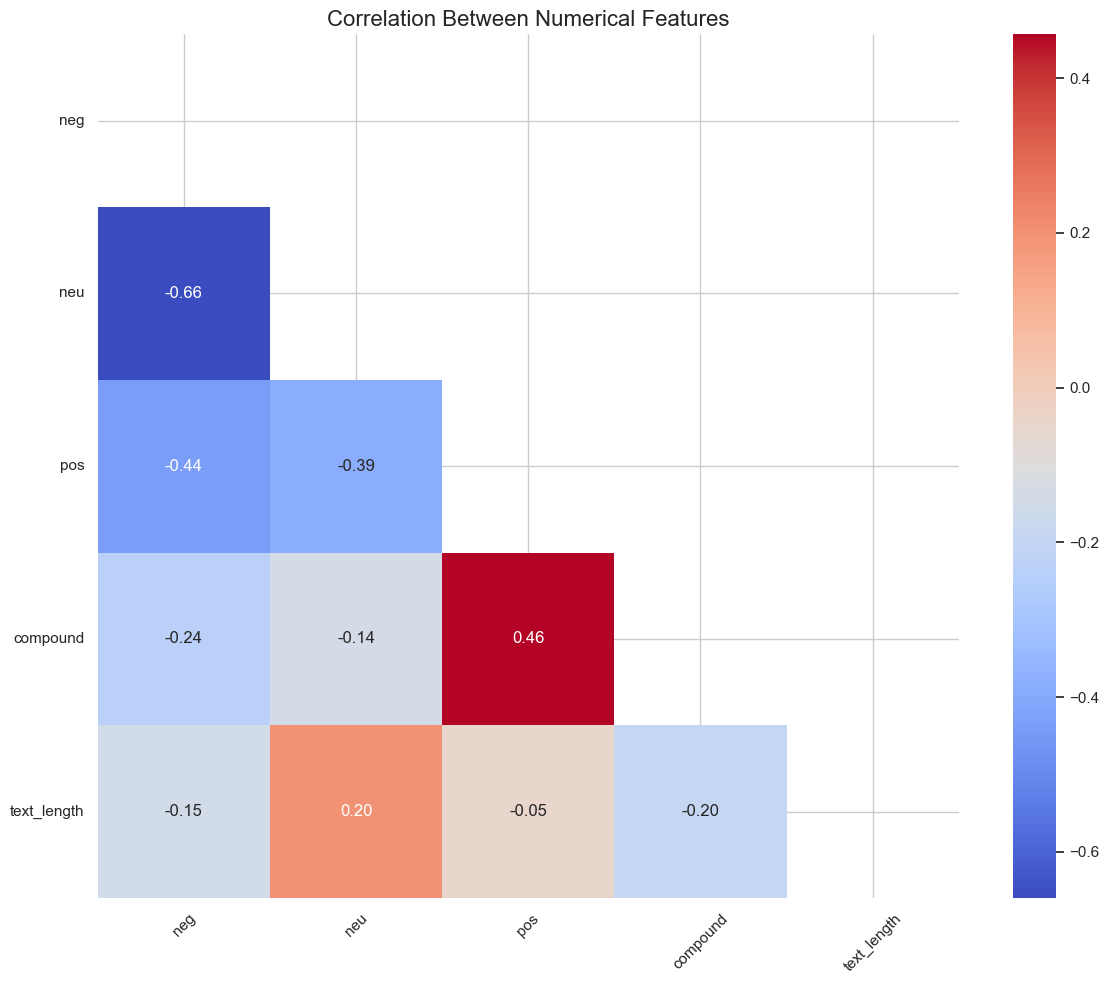

In [11]:
# Select numerical columns for correlation analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove any ID columns or irrelevant numeric columns
num_cols = [col for col in num_cols if not any(x in col.lower() for x in ['id', 'index'])]

if len(num_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = df[num_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(corr_matrix)
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
    plt.title('Correlation Between Numerical Features', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()